## Weather file summarize

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader
from palettable.colorbrewer.sequential import YlGn_9

from ideotype.weafile_process import (wea_preprocess,
                                      wea_siteyears,
                                      wea_filter,
                                      wea_summarize)
from ideotype.nass_process import nass_summarize

In [7]:
df_nass = nass_summarize(1961,2005)
df_nass.shape

(3108, 7)

In [8]:
df_nass.head()

,state_id,county_id,lat,lon,area,yield,perct_irri
0,1.0,1.0,32.462991,-86.709691,6758.2607,3.041016,2.112183
1,1.0,3.0,30.787262,-87.712913,19748.6900,4.867478,8.510410
2,1.0,5.0,31.870087,-85.383129,11452.6210,3.540944,4.945534
3,1.0,7.0,33.072877,-87.112698,2092.2280,2.303269,0.624115
4,1.0,9.0,33.988350,-86.613622,10064.5470,4.070473,0.940536


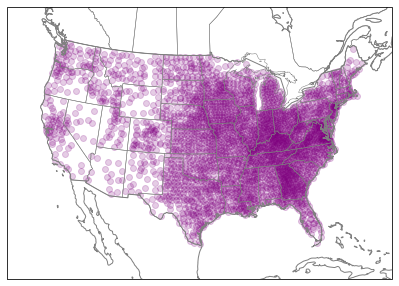

In [6]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
                     central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123,-72,19,53])
df_sub = df_nass
ax.scatter(df_sub.lon, df_sub.lat, 
           transform=ccrs.PlateCarree(), c='purple', alpha=0.2)

ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)

In [9]:
# Run name
run_name = 'control_fixpd'

# Paths
basepath = '/home/disk/eos8/ach315/upscale/weadata/process'
outpath = '/home/disk/eos8/ach315/upscale/weadata'

# Preprocess combined weather data
df_temp, df_rh, df_precip, df_solrad = wea_preprocess(basepath)

# Select valid site-years
gseason_start = 2
gseason_end = 11
crthr = 2
siteyears = wea_siteyears(df_temp, df_rh, df_precip, df_solrad,
                          gseason_start, gseason_end, crthr)

# Filter site-years based on area, irrigation, & estimated pdate
area = 10000/2.47  # convert acre into ha
irri = 30
yearspersite = 15
siteyears_filtered = wea_filter(siteyears, area, irri, yearspersite)

In [3]:
siteyears_filtered.shape

(1177, 2)